In [28]:
#torch19

In [46]:
# from dataset import MXFaceDataset
# env torch19
%cd /home/thucth/thucth/project/insightface/recognition/arcface_torch/
import mxnet as mx
import os
import numpy as np
from tqdm import tqdm
import torch

/home/thucth/thucth/project/insightface/recognition/arcface_torch


In [47]:
root_dir = "/mnt/data/webface42m10faces"

path_imgrec = os.path.join(root_dir, 'train.rec')
path_imgidx = os.path.join(root_dir, 'train.idx')
imgrec = mx.recordio.MXIndexedRecordIO(path_imgidx, path_imgrec, 'r')

/mnt/data/webface42m10faces/train.rec


In [48]:
s = imgrec.read_idx(0)
header, _ = mx.recordio.unpack(s)
# import pdb; pdb.set_trace()
if header.flag > 0:
    header0 = (int(header.label[0]), int(header.label[1]))
    imgidx = np.array(range(1, int(header.label[0])))
else:
    imgidx = np.array(list(imgrec.keys))
print(len(imgidx))

37375383


In [52]:
header

HEADER(flag=2, label=array([37375384., 38517232.], dtype=float32), id=0, id2=1)

In [53]:
imgidx

array([       1,        2,        3, ..., 37375381, 37375382, 37375383])

In [54]:
np.array(range(1,37375383)) 

array([       1,        2,        3, ..., 37375380, 37375381, 37375382])

In [12]:
5908396 - 5822654

85742

In [25]:
idx = 5822655
s = imgrec.read_idx(idx)
header, img = mx.recordio.unpack(s)
label = header.label
if not isinstance(label, numbers.Number):
    label = label[0]
label = torch.tensor(label, dtype=torch.long)
print(label)

tensor(5822557)


/tmp/ipykernel_9880/2148269959.py:7: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


/tmp/ipykernel_9880/3555229251.py:9: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


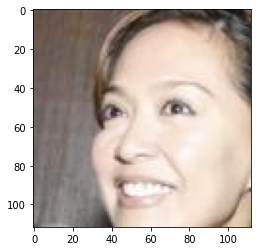

In [23]:
import numbers
import matplotlib.pyplot as plt
idx = 5822653
s = imgrec.read_idx(idx)
header, img = mx.recordio.unpack(s)
label = header.label
if not isinstance(label, numbers.Number):
    label = label[0]
label = torch.tensor(label, dtype=torch.long)
sample = mx.image.imdecode(img).asnumpy()
plt.imshow(sample)